<a href="https://colab.research.google.com/github/Zenologos/Praxis/blob/main/ANOVA_test_MAIN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.reneshbedre.com/blog/anova.html


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
!pip install "statsmodels==0.12.2"

     |████████████████████████████████| 9.5 MB 9.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
!pip install "tslearn==0.5.2"

     |████████████████████████████████| 793 kB 8.0 MB/s 


In [4]:
!pip install bioinfokit

     |████████████████████████████████| 84 kB 2.1 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.6-py3-none-any.whl size=57066 sha256=655fdc6e8a96644f04c7ec17bf157a28715456624ceb1639c7e86a66c3883fc7
  Stored in directory: /root/.cache/pip/wheels/38/b2/a0/3f65c463d3faababa8cb5f3076e3bfc1c49fea2a736a49038a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=d18871daa2f6efad0d756784acb5a385e8fb726d178d5192a49c9d09f22552a5
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [5]:
#for ANOVA
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat

In [6]:
#General python libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os, sys
from os.path import *
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from mpmath import *


In [7]:
#Modules for statistical models
from statsmodels.tsa.forecasting.theta import ThetaModel
from statsmodels.tsa.api import SimpleExpSmoothing

In [8]:
#Modules for ML models
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.neighbors import KNeighborsTimeSeriesRegressor
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import  MLPRegressor

In [9]:
#for ANOVA
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
root_path = 'gdrive/My Drive/Praxis/Data'  #change dir to your project folder

In [58]:
# hypothesis number and file
hypothesis = 3 
file = 'h3_adi.csv'

In [59]:
#CHANGE if you want scaling or not for the ML models
SCALE = True

In [60]:
datafolder = join(root_path,file)

In [61]:
df = pd.read_csv(datafolder)

In [62]:
df.shape

(959, 324)

In [63]:
df.head()

,repair_part_number,1.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,...,295.0,296.0,297.0,298.0,299.0,300.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0,310.0,311.0,312.0,313.0,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321.0,322.0,323.0,324.0,325.0,326.0,327.0,328.0,329.0,330.0,adi,avg_demand,variance,cv2
0,01-04776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.5,10.5,90.25,0.818594
1,01-04783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.5,16.5,182.25,0.669421
2,0115007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,5.4,53.44,1.832647
3,0115012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335.0,2.0,0.00,0.000000
4,0125617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335.0,2.0,0.00,0.000000


In [64]:

df.columns

Index(['repair_part_number', '1.0', '13.0', '14.0', '15.0', '16.0', '17.0',
       '18.0', '19.0', '20.0',
       ...
       '325.0', '326.0', '327.0', '328.0', '329.0', '330.0', 'adi',
       'avg_demand', 'variance', 'cv2'],
      dtype='object', length=324)

In [65]:
df.isnull().sum()

repair_part_number    0
1.0                   0
13.0                  0
14.0                  0
15.0                  0
                     ..
330.0                 0
adi                   0
avg_demand            1
variance              1
cv2                   1
Length: 324, dtype: int64

In [66]:
df.isnull().values.sum()

3

In [67]:
df.index

RangeIndex(start=0, stop=959, step=1)

In [68]:
if hypothesis == 3:
  # df.insert(loc=[1,3,4,5,6,7,8,9,10,11,12,13], column=[df'0.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0','11.0','12.0'], value=0)
  df.insert(loc=1, column='0.0', value=0.0)
  df.insert(loc=3, column='2.0', value=0.0)
  df.insert(loc=4, column='3.0', value=0.0)
  df.insert(loc=5, column='4.0', value=0.0)
  df.insert(loc=6, column='5.0', value=0.0)
  df.insert(loc=7, column='6.0', value=0.0)
  df.insert(loc=8, column='7.0', value=0.0)
  df.insert(loc=9, column='8.0', value=0.0)
  df.insert(loc=10, column='9.0', value=0.0)
  df.insert(loc=11, column='10.0', value=0.0)
  df.insert(loc=12, column='11.0', value=0.0)
  df.insert(loc=13, column='12.0', value=0.0)

In [69]:
df

,repair_part_number,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,...,295.0,296.0,297.0,298.0,299.0,300.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0,310.0,311.0,312.0,313.0,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321.0,322.0,323.0,324.0,325.0,326.0,327.0,328.0,329.0,330.0,adi,avg_demand,variance,cv2
0,01-04776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.500000,10.5,90.25,0.818594
1,01-04783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.500000,16.5,182.25,0.669421
2,0115007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.000000,5.4,53.44,1.832647
3,0115012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335.000000,2.0,0.00,0.000000
4,0125617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335.000000,2.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,YYI1-DE2634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.500000,1.5,0.25,0.111111
955,ZR72KC-TF5-950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335.000000,1.0,0.00,0.000000
956,ZRD125KCE-TFD-250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.222222,1.0,0.00,0.000000
957,ZTX458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335.000000,1.0,0.00,0.000000


In [70]:
  if hypothesis == 3:
    df.insert(loc=332, column='331.0', value=0.0)
    df.insert(loc=333, column='332.0', value=0.0)
    df.insert(loc=334, column='333.0', value=0.0)
    df.insert(loc=335, column='334.0', value=0.0)

In [71]:
# df.columns.get_loc("adi")

In [72]:
df

,repair_part_number,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,...,299.0,300.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0,310.0,311.0,312.0,313.0,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321.0,322.0,323.0,324.0,325.0,326.0,327.0,328.0,329.0,330.0,331.0,332.0,333.0,334.0,adi,avg_demand,variance,cv2
0,01-04776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.500000,10.5,90.25,0.818594
1,01-04783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.500000,16.5,182.25,0.669421
2,0115007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.000000,5.4,53.44,1.832647
3,0115012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335.000000,2.0,0.00,0.000000
4,0125617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335.000000,2.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,YYI1-DE2634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.500000,1.5,0.25,0.111111
955,ZR72KC-TF5-950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335.000000,1.0,0.00,0.000000
956,ZRD125KCE-TFD-250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.222222,1.0,0.00,0.000000
957,ZTX458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335.000000,1.0,0.00,0.000000


In [73]:
# Cutoff - June 1,2017 - Cut off 282 out of 334 weeks - for all years # for H1,H2, H3 and H4
# Cutoff - June 1, 2013 - 73 out of 104 weeks - test size = 104-73 = 31 weeks - for 0-2 years for H5
# Cutoff - June 1, 2015 - 178 out of 208 weeks - test size = 208 - 178 = 30 weeks for 0-4 years for H5
df_train = df.loc[:,'0.0':'282.0'].copy()
df_test = df.loc[:,'282.0':'334.0'].copy()

In [74]:
df_train.shape, df_test.shape, df.shape

((959, 283), (959, 53), (959, 340))

In [75]:
df_train

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,...,243.0,244.0,245.0,246.0,247.0,248.0,249.0,250.0,251.0,252.0,253.0,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0,270.0,271.0,272.0,273.0,274.0,275.0,276.0,277.0,278.0,279.0,280.0,281.0,282.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
df_test

,282.0,283.0,284.0,285.0,286.0,287.0,288.0,289.0,290.0,291.0,292.0,293.0,294.0,295.0,296.0,297.0,298.0,299.0,300.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0,310.0,311.0,312.0,313.0,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321.0,322.0,323.0,324.0,325.0,326.0,327.0,328.0,329.0,330.0,331.0,332.0,333.0,334.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
# Code from Nicholas Vandeput. Change alpha, beta and extra_periods values here. extra_periods is the forecating horizon(h)
# extra_periods = 53 (for entire time range), 32(for 0 - 2 yrs), 31 (for 0 - 4 yrs)
def Croston_TSB(train_row,test_row,extra_periods=53,alpha=0.2,beta=0.2): # CHANGE the time period here for H5
  d = np.array(train_row) # Transform the input into a numpy array
  cols = len(d) # Historical period length
  d = np.append(d,[np.nan]*extra_periods) # Append np.nan into the demand array to cover future periods
  
  #level (a), probability(p) and forecast (f)
  a,p,f = np.full((3,cols+extra_periods),np.nan)
# Initialization
  first_occurence = np.argmax(d[:cols]>0)
  a[0] = d[first_occurence]
  p[0] = 1/(1 + first_occurence)
  f[0] = p[0]*a[0]
                
  # Create all the t+1 forecasts
  for t in range(0,cols):
    if d[t] > 0:
      a[t+1] = alpha*d[t] + (1-alpha)*a[t] 
      p[t+1] = beta*(1) + (1-beta)*p[t]  
    else:
      a[t+1] = a[t]
      p[t+1] = (1-beta)*p[t]       
      f[t+1] = p[t+1]*a[t+1]
      
  # Future Forecast
  a[cols+1:cols+extra_periods] = a[cols]
  p[cols+1:cols+extra_periods] = p[cols]
  f[cols+1:cols+extra_periods] = f[cols]
                    
  pred = pd.DataFrame.from_dict({"Demand":d,"Forecast":f,"Period":p,"Level":a,"Error":d-f})
  pred.fillna(value=0,inplace=True) # to take care of Nan values 
  rmse_value = mean_squared_error(test_row,pred.loc[283:,'Forecast'],squared=False) # CHANGE the time period here for H5
  mae_value = mean_absolute_error(test_row,pred.loc[283:,'Forecast']) # CHANGE the time period here for H5

  return rmse_value, mae_value # CHANGE the time period here for H5

In [78]:
def SES_model(train_row,test_row):
  #input this function is a single row (representing each repair part number)with demand numbers for all periods in either train/test set
  ses = SimpleExpSmoothing(train_row).fit() 
  # print(ses.summary()) # if summary statistics needed for individual row for study.
  fcast = ses.forecast(len(test_row))
  rmse_value = mean_squared_error(test_row,fcast, squared= False)
  mae_value = mean_absolute_error(test_row, fcast)
  return rmse_value, mae_value

In [79]:
def DOTM_model(train_row,test_row):
  #input this function is a single row (representing each repair part number)with demand numbers for all periods in either train/test set
  # train_row.set_index
  dotm = ThetaModel(train_row,deseasonalize=False).fit() 
  # print(dotm.summary()) # if summary statistics needed for individual row for study.
  fcast = dotm.forecast(len(test_row))
  rmse_value = mean_squared_error(test_row,fcast, squared= False)
  mae_value = mean_absolute_error(test_row, fcast)
  return rmse_value, mae_value

In [80]:
#call this function for each row and then fit model
# split a univariate sequence into samples.
# convert data into a supervised learning problem using a sliding window.
# step_back = 4 (one month)
def split_row(row, step_back): 
	X, y = list(), list()
	for i in range(len(row)):
		# find the end of this pattern
		end_ix = i + step_back
		# check if we are beyond the sequence
		if end_ix > len(row)-1:
			break
		# gather input and output parts of the pattern
		row_x, row_y = row[i:end_ix], row[end_ix]
		X.append(row_x)
		y.append(row_y)
	return np.array(X), np.array(y)

In [132]:
def models(train_row,test_row,SCALE):
  #input this function is a single row (representing each repair part number)with demand numbers for all periods in either train/test set
  #define look back period for generating dataset # have kept a default of 4 (i.e. 1 month)
  #call function to split each row into feature matrix and target
  
  step_back = 4 #CHANGE HERE
  X_train, y_train = split_row(train_row,step_back)
  X_test, y_test = split_row(test_row,step_back)
  
  if SCALE == True:
    X_train = TimeSeriesScalerMinMax().fit_transform(X_train)
    X_test = TimeSeriesScalerMinMax().fit_transform(X_test)

    # a,b,c = X_train.shape
    # x,y,z = X_test.shape
    # X_train = X_train.reshape((a,b*c))
    # X_test = X_test.reshape((x,y*z))
    
    #IF THE ABOVE 4 LINES OF CODE GIVE AN ERROR, RUN THE NEXT TWO LINES INSTEAD. 
    X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0],X_test.shape[1]))

  rf = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators = 10, max_depth = 5) #CHANGE MODEL HERE AS PER NESTED CV RESULTS
  svr = SVR(kernel='rbf',C=0.01,epsilon=0.01,shrinking=True) #CHANGE MODEL HERE AS PER NESTED CV RESULTS
  knn = KNeighborsTimeSeriesRegressor(metric="dtw",n_jobs=-1,n_neighbors=5) #CHANGE MODEL HERE AS PER NESTED CV RESULTS
  mlp = MLPRegressor(hidden_layer_sizes =(3,3,3),activation="relu" ,random_state=1, max_iter=2000)

  knn.fit(X_train, y_train) 
  rf.fit(X_train, y_train)
  svr.fit(X_train, y_train)
  mlp.fit(X_train, y_train)

  rmse_tsb, mae_tsb = Croston_TSB(train_row, test_row)
  rmse_ses, mae_ses = SES_model(train_row, test_row)
  rmse_dotm, mae_dotm = DOTM_model(train_row,test_row)

  rmse_knn = mean_squared_error(y_test,knn.predict(X_test), squared= False)
  mae_knn = mean_absolute_error(y_test, knn.predict(X_test))

  rmse_rf = mean_squared_error(y_test,rf.predict(X_test), squared= False)
  mae_rf = mean_absolute_error(y_test, rf.predict(X_test))

  rmse_svr = mean_squared_error(y_test,svr.predict(X_test), squared= False)
  mae_svr = mean_absolute_error(y_test, svr.predict(X_test))

  rmse_mlp = mean_squared_error(y_test,mlp.predict(X_test), squared= False)
  mae_mlp = mean_absolute_error(y_test, mlp.predict(X_test))

  return rmse_tsb, rmse_ses, rmse_dotm, rmse_knn, rmse_rf, rmse_svr, rmse_mlp, mae_tsb, mae_ses, mae_dotm, mae_knn, mae_rf, mae_svr, mae_mlp

In [133]:
errors = pd.DataFrame()

In [134]:
#you can ignore the warnings displayed for dotm
%%capture
errors[['rmse_tsb','rmse_ses','rmse_dotm','rmse_knn','rmse_rf', 'rmse_svr', 'rmse_mlp', 'mae_tsb', 'mae_ses', 'mae_dotm', 'mae_knn','mae_rf', 'mae_svr', 'mae_mlp']] = df_train.apply(lambda train_row: models(train_row,df_test.iloc[train_row.name],SCALE), axis=1, result_type='expand')

In [135]:
errors

,rmse_tsb,rmse_ses,rmse_dotm,rmse_knn,rmse_rf,rmse_svr,rmse_mlp,mae_tsb,mae_ses,mae_dotm,mae_knn,mae_rf,mae_svr,mae_mlp
0,1.368727e-01,0.145587,0.210838,0.142857,0.145505,0.141774,0.164951,2.267985e-02,0.086872,0.191110,0.020408,0.072890,0.03,0.101488
1,1.663791e-03,0.116608,0.247905,0.000000,0.096313,0.010000,0.114547,1.663791e-03,0.116608,0.247614,0.000000,0.096313,0.01,0.114547
2,2.169917e-01,0.154407,0.230042,0.142857,0.154752,0.141774,0.169275,1.996820e-01,0.107274,0.215156,0.020408,0.097778,0.03,0.116581
3,2.271371e-15,0.007067,0.000404,0.000000,0.005805,0.010000,0.006331,2.271371e-15,0.007067,0.000401,0.000000,0.005805,0.01,0.006331
4,2.271371e-15,0.007067,0.000404,0.000000,0.005805,0.010000,0.006331,2.271371e-15,0.007067,0.000401,0.000000,0.005805,0.01,0.006331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,6.795744e-13,0.010601,0.006078,0.000000,0.013570,0.010000,0.007240,6.795744e-13,0.010601,0.006078,0.000000,0.013570,0.01,0.007240
955,2.891892e-25,0.003534,0.008118,0.000000,0.003265,0.010000,0.004302,2.891892e-25,0.003534,0.008107,0.000000,0.003265,0.01,0.004302
956,4.534745e-03,0.031802,0.036530,0.000000,0.029630,0.010000,0.033737,4.534745e-03,0.031802,0.036527,0.000000,0.029630,0.01,0.033737
957,2.126765e-05,0.003534,0.008176,0.000000,0.003637,0.010000,0.008747,2.126765e-05,0.003534,0.008166,0.000000,0.003637,0.01,0.008747


In [136]:
errors.to_csv('H3_errors.csv')

In [137]:
#STOP!!!
#save file on google drive
#change the path to save this errors.csv file

!cp H3_errors.csv /content/gdrive/MyDrive/Praxis/Data

In [138]:
# file = 'H3_errors.csv'
# datafolder = join(root_path,file)
# hypothesis=3
# SCALE=True
# errors = pd.read_csv(datafolder)
# errors.drop(columns='Unnamed: 0',inplace=True)

In [139]:
rmse_fvalue, rmse_pvalue = stats.f_oneway(errors['rmse_tsb'],errors['rmse_ses'],errors['rmse_dotm'],errors['rmse_rf'],errors['rmse_svr'],errors['rmse_mlp'])

In [140]:
print(f'f and p value of RMSE values of all models is {rmse_fvalue} and {rmse_pvalue} respectively, for Hypothesis {hypothesis} , with no scaling of statistical models, and SCALE = {SCALE} for ML models') 

f and p value of RMSE values of all models is 0.23770635587950983 and 0.9459550347590447 respectively, for Hypothesis 3 , with no scaling of statistical models, and SCALE = True for ML models


In [141]:
mae_fvalue, mae_pvalue = stats.f_oneway(errors['mae_tsb'],errors['mae_ses'],errors['mae_dotm'],errors['mae_rf'],errors['mae_svr'],errors['mae_mlp'])

In [142]:
print(f'f and p value of MAE values of all models is {mae_fvalue} and {mae_pvalue} respectively, for Hypothesis {hypothesis} , with no scaling of statistical models, and SCALE = {SCALE} for ML models') 

f and p value of MAE values of all models is 3.6426676974832874 and 0.00271829521545397 respectively, for Hypothesis 3 , with no scaling of statistical models, and SCALE = True for ML models


In [143]:
errors 

,rmse_tsb,rmse_ses,rmse_dotm,rmse_knn,rmse_rf,rmse_svr,rmse_mlp,mae_tsb,mae_ses,mae_dotm,mae_knn,mae_rf,mae_svr,mae_mlp
0,1.368727e-01,0.145587,0.210838,0.142857,0.145505,0.141774,0.164951,2.267985e-02,0.086872,0.191110,0.020408,0.072890,0.03,0.101488
1,1.663791e-03,0.116608,0.247905,0.000000,0.096313,0.010000,0.114547,1.663791e-03,0.116608,0.247614,0.000000,0.096313,0.01,0.114547
2,2.169917e-01,0.154407,0.230042,0.142857,0.154752,0.141774,0.169275,1.996820e-01,0.107274,0.215156,0.020408,0.097778,0.03,0.116581
3,2.271371e-15,0.007067,0.000404,0.000000,0.005805,0.010000,0.006331,2.271371e-15,0.007067,0.000401,0.000000,0.005805,0.01,0.006331
4,2.271371e-15,0.007067,0.000404,0.000000,0.005805,0.010000,0.006331,2.271371e-15,0.007067,0.000401,0.000000,0.005805,0.01,0.006331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,6.795744e-13,0.010601,0.006078,0.000000,0.013570,0.010000,0.007240,6.795744e-13,0.010601,0.006078,0.000000,0.013570,0.01,0.007240
955,2.891892e-25,0.003534,0.008118,0.000000,0.003265,0.010000,0.004302,2.891892e-25,0.003534,0.008107,0.000000,0.003265,0.01,0.004302
956,4.534745e-03,0.031802,0.036530,0.000000,0.029630,0.010000,0.033737,4.534745e-03,0.031802,0.036527,0.000000,0.029630,0.01,0.033737
957,2.126765e-05,0.003534,0.008176,0.000000,0.003637,0.010000,0.008747,2.126765e-05,0.003534,0.008166,0.000000,0.003637,0.01,0.008747


In [144]:
errors.mean()

rmse_tsb     0.128594
rmse_ses     0.136981
rmse_dotm    0.156088
rmse_knn     0.162151
rmse_rf      0.130331
rmse_svr     0.106831
rmse_mlp     0.130631
mae_tsb      0.053849
mae_ses      0.065693
mae_dotm     0.086089
mae_knn      0.076210
mae_rf       0.053786
mae_svr      0.026270
mae_mlp      0.057400
dtype: float64

In [145]:
errors.min()

rmse_tsb     0.000000
rmse_ses     0.000000
rmse_dotm    0.000000
rmse_knn     0.000000
rmse_rf      0.000000
rmse_svr     0.000000
rmse_mlp     0.000285
mae_tsb      0.000000
mae_ses      0.000000
mae_dotm     0.000000
mae_knn      0.000000
mae_rf       0.000000
mae_svr      0.000000
mae_mlp      0.000285
dtype: float64

In [146]:
errors.max()

rmse_tsb     27.472113
rmse_ses     27.472113
rmse_dotm    27.472113
rmse_knn     28.571429
rmse_rf      28.571429
rmse_svr     28.571429
rmse_mlp     28.571607
mae_tsb       7.730941
mae_ses       9.197872
mae_dotm     10.654705
mae_knn      10.979592
mae_rf        5.523754
mae_svr       4.081633
mae_mlp       4.216622
dtype: float64

In [147]:
rmse_df = errors.copy()

In [148]:
rmse_df

,rmse_tsb,rmse_ses,rmse_dotm,rmse_knn,rmse_rf,rmse_svr,rmse_mlp,mae_tsb,mae_ses,mae_dotm,mae_knn,mae_rf,mae_svr,mae_mlp
0,1.368727e-01,0.145587,0.210838,0.142857,0.145505,0.141774,0.164951,2.267985e-02,0.086872,0.191110,0.020408,0.072890,0.03,0.101488
1,1.663791e-03,0.116608,0.247905,0.000000,0.096313,0.010000,0.114547,1.663791e-03,0.116608,0.247614,0.000000,0.096313,0.01,0.114547
2,2.169917e-01,0.154407,0.230042,0.142857,0.154752,0.141774,0.169275,1.996820e-01,0.107274,0.215156,0.020408,0.097778,0.03,0.116581
3,2.271371e-15,0.007067,0.000404,0.000000,0.005805,0.010000,0.006331,2.271371e-15,0.007067,0.000401,0.000000,0.005805,0.01,0.006331
4,2.271371e-15,0.007067,0.000404,0.000000,0.005805,0.010000,0.006331,2.271371e-15,0.007067,0.000401,0.000000,0.005805,0.01,0.006331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,6.795744e-13,0.010601,0.006078,0.000000,0.013570,0.010000,0.007240,6.795744e-13,0.010601,0.006078,0.000000,0.013570,0.01,0.007240
955,2.891892e-25,0.003534,0.008118,0.000000,0.003265,0.010000,0.004302,2.891892e-25,0.003534,0.008107,0.000000,0.003265,0.01,0.004302
956,4.534745e-03,0.031802,0.036530,0.000000,0.029630,0.010000,0.033737,4.534745e-03,0.031802,0.036527,0.000000,0.029630,0.01,0.033737
957,2.126765e-05,0.003534,0.008176,0.000000,0.003637,0.010000,0.008747,2.126765e-05,0.003534,0.008166,0.000000,0.003637,0.01,0.008747


In [149]:
rmse_df.drop(columns=['mae_tsb', 'mae_ses', 'mae_dotm', 'mae_rf', 'mae_svr', 'mae_mlp'],inplace=True)

In [150]:
mae_df = errors.copy()

In [151]:
mae_df.drop(columns=['rmse_tsb', 'rmse_ses', 'rmse_dotm', 'rmse_rf', 'rmse_svr', 'rmse_mlp'],inplace=True)

In [152]:
rmse_df

,rmse_tsb,rmse_ses,rmse_dotm,rmse_knn,rmse_rf,rmse_svr,rmse_mlp,mae_knn
0,1.368727e-01,0.145587,0.210838,0.142857,0.145505,0.141774,0.164951,0.020408
1,1.663791e-03,0.116608,0.247905,0.000000,0.096313,0.010000,0.114547,0.000000
2,2.169917e-01,0.154407,0.230042,0.142857,0.154752,0.141774,0.169275,0.020408
3,2.271371e-15,0.007067,0.000404,0.000000,0.005805,0.010000,0.006331,0.000000
4,2.271371e-15,0.007067,0.000404,0.000000,0.005805,0.010000,0.006331,0.000000
...,...,...,...,...,...,...,...,...
954,6.795744e-13,0.010601,0.006078,0.000000,0.013570,0.010000,0.007240,0.000000
955,2.891892e-25,0.003534,0.008118,0.000000,0.003265,0.010000,0.004302,0.000000
956,4.534745e-03,0.031802,0.036530,0.000000,0.029630,0.010000,0.033737,0.000000
957,2.126765e-05,0.003534,0.008176,0.000000,0.003637,0.010000,0.008747,0.000000


In [153]:
rmse_melt = pd.melt(rmse_df.reset_index(), id_vars=['index'], value_vars=['rmse_tsb', 'rmse_ses', 'rmse_dotm', 'rmse_knn', 'rmse_rf', 'rmse_svr', 'rmse_mlp'])

In [154]:
rmse_melt

,index,variable,value
0,0,rmse_tsb,1.368727e-01
1,1,rmse_tsb,1.663791e-03
2,2,rmse_tsb,2.169917e-01
3,3,rmse_tsb,2.271371e-15
4,4,rmse_tsb,2.271371e-15
...,...,...,...
6708,954,rmse_mlp,7.239968e-03
6709,955,rmse_mlp,4.302390e-03
6710,956,rmse_mlp,3.373730e-02
6711,957,rmse_mlp,8.746569e-03


In [155]:
rmse_melt.columns = ['index', 'Forecast_Method', 'value']

In [156]:
rmse_melt

,index,Forecast_Method,value
0,0,rmse_tsb,1.368727e-01
1,1,rmse_tsb,1.663791e-03
2,2,rmse_tsb,2.169917e-01
3,3,rmse_tsb,2.271371e-15
4,4,rmse_tsb,2.271371e-15
...,...,...,...
6708,954,rmse_mlp,7.239968e-03
6709,955,rmse_mlp,4.302390e-03
6710,956,rmse_mlp,3.373730e-02
6711,957,rmse_mlp,8.746569e-03


In [157]:
rmse_model = ols('value ~ Forecast_Method', data=rmse_melt).fit()
rmse_anova_table = sm.stats.anova_lm(rmse_model, typ=2)
rmse_anova_table

,sum_sq,df,F,PR(>F)
Forecast_Method,1.970741,6.0,0.306581,0.933828
Residual,7184.509300,6706.0,NaN,NaN


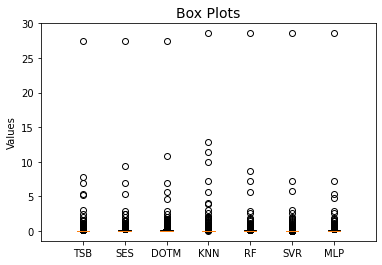

In [158]:
fig, ax = plt.subplots()
plt.boxplot(errors['rmse_tsb'], positions = [0.5])
plt.boxplot(errors['rmse_ses'], positions = [1])
plt.boxplot(errors['rmse_dotm'], positions = [1.5])
plt.boxplot(errors['rmse_knn'], positions = [2])
plt.boxplot(errors['rmse_rf'], positions = [2.5])
plt.boxplot(errors['rmse_svr'], positions = [3])
plt.boxplot(errors['rmse_mlp'], positions = [3.5])
plt.title("Box Plots",fontsize=14)
plt.ylabel('Values')
plt.xticks([0.5,1,1.5,2,2.5,3,3.5], ['TSB', 'SES','DOTM','KNN','RF','SVR','MLP']);

In [159]:
mae_df


,rmse_knn,mae_tsb,mae_ses,mae_dotm,mae_knn,mae_rf,mae_svr,mae_mlp
0,0.142857,2.267985e-02,0.086872,0.191110,0.020408,0.072890,0.03,0.101488
1,0.000000,1.663791e-03,0.116608,0.247614,0.000000,0.096313,0.01,0.114547
2,0.142857,1.996820e-01,0.107274,0.215156,0.020408,0.097778,0.03,0.116581
3,0.000000,2.271371e-15,0.007067,0.000401,0.000000,0.005805,0.01,0.006331
4,0.000000,2.271371e-15,0.007067,0.000401,0.000000,0.005805,0.01,0.006331
...,...,...,...,...,...,...,...,...
954,0.000000,6.795744e-13,0.010601,0.006078,0.000000,0.013570,0.01,0.007240
955,0.000000,2.891892e-25,0.003534,0.008107,0.000000,0.003265,0.01,0.004302
956,0.000000,4.534745e-03,0.031802,0.036527,0.000000,0.029630,0.01,0.033737
957,0.000000,2.126765e-05,0.003534,0.008166,0.000000,0.003637,0.01,0.008747


In [160]:
mae_melt = pd.melt(mae_df.reset_index(), id_vars=['index'], value_vars=['mae_tsb', 'mae_ses', 'mae_dotm', 'mae_knn', 'mae_rf', 'mae_svr', 'mae_mlp'])

In [161]:
mae_melt

,index,variable,value
0,0,mae_tsb,2.267985e-02
1,1,mae_tsb,1.663791e-03
2,2,mae_tsb,1.996820e-01
3,3,mae_tsb,2.271371e-15
4,4,mae_tsb,2.271371e-15
...,...,...,...
6708,954,mae_mlp,7.239968e-03
6709,955,mae_mlp,4.302390e-03
6710,956,mae_mlp,3.373730e-02
6711,957,mae_mlp,8.746569e-03


In [162]:
mae_melt.columns = ['index', 'Forecast_Method', 'value']

In [163]:
mae_melt

,index,Forecast_Method,value
0,0,mae_tsb,2.267985e-02
1,1,mae_tsb,1.663791e-03
2,2,mae_tsb,1.996820e-01
3,3,mae_tsb,2.271371e-15
4,4,mae_tsb,2.271371e-15
...,...,...,...
6708,954,mae_mlp,7.239968e-03
6709,955,mae_mlp,4.302390e-03
6710,956,mae_mlp,3.373730e-02
6711,957,mae_mlp,8.746569e-03


In [164]:
mae_model = ols('value ~ Forecast_Method', data=mae_melt).fit()
mae_anova_table = sm.stats.anova_lm(mae_model, typ=2)
mae_anova_table

,sum_sq,df,F,PR(>F)
Forecast_Method,2.106592,6.0,2.607158,0.015888
Residual,903.078182,6706.0,NaN,NaN


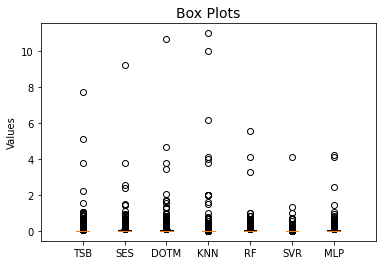

In [165]:
fig, ax = plt.subplots()
plt.boxplot(errors['mae_tsb'], positions = [0.5])
plt.boxplot(errors['mae_ses'], positions = [1])
plt.boxplot(errors['mae_dotm'], positions = [1.5])
plt.boxplot(errors['mae_knn'], positions = [2])
plt.boxplot(errors['mae_rf'], positions = [2.5])
plt.boxplot(errors['mae_svr'], positions = [3])
plt.boxplot(errors['mae_mlp'], positions = [3.5])
plt.title("Box Plots",fontsize=14)
plt.ylabel('Values')
plt.xticks([0.5,1,1.5,2,2.5,3,3.5], ['TSB', 'SES','DOTM','KNN','RF','SVR','MLP']);

In [166]:
#HERE ARE FEW VISUALS 
# YOU CAN MODIFY THEM AS NEEDED
# HERE IS THE DOCUMENTATION
# https://seaborn.pydata.org/generated/seaborn.boxplot.html

AttributeError: ignored

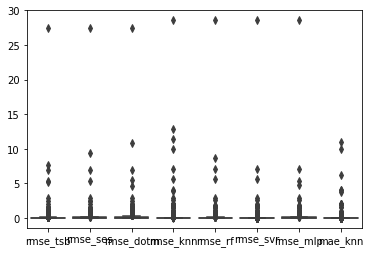

In [167]:
ax = sns.boxplot(data=rmse_df)
ax.yl
plt.show()

In [ ]:
# ax = sns.boxplot(data=rmse_df,color='b')
# ax = sns.violinplot(data=rmse_df, inner=None)
# plt.show()

In [ ]:
ax = sns.boxplot(data=mae_df,color='r')
plt.show()

In [ ]:
 fig, ax = plt.subplots()
plt.boxplot(errors['mae_tsb'], positions = [0.5])
 plt.boxplot(errors['mae_ses'], positions = [1])
 plt.boxplot(errors['mae_dotm'], positions = [1.5])
 plt.boxplot(errors['mae_knn'], positions = [2])
 plt.boxplot(errors['mae_rf'], positions = [2.5])
 plt.boxplot(errors['mae_svr'], positions = [3])
 plt.boxplot(errors['mae_mlp'], positions = [3.5])
 plt.title("Box Plots",fontsize=14)
 plt.ylabel('Values')
 plt.xticks([0.5,1,1.5,2,2.5,3,3.5], ['TSB', 'SES','DOTM','KNN','RF','SVR','MLP']);

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# ax = sns.boxplot(data=rmse_df, color='blue')
# ax = sns.swarmplot(data=rmse_df, color='orange')
# plt.show()